In [1]:
import numpy as np
import scipy
import imageio
import matplotlib.pyplot as plt

In [2]:
def findClosestCentroids(X, centroids):
    """Assign every training examples to its closest cetroid 
    """
    n_samples = X.shape[0]
    idx = np.zeros(n_samples)
    for i in range(n_samples):
        dist = np.sum(np.square(centroids - X[i]), axis=1)
        idx[i] = dist.argmin()
    return idx

In [3]:
def computeCentroids(X, idx, K):
    """Compute the mean of the points that are assigned to each centroid
    """
    n_samples = X.shape[0]
    n_features = X.shape[1]
    centroids = np.zeros((K, n_features))
    for i in range(K):
        X_c = X[idx==i]
        centroids[i] = np.mean(X_c, axis=0)
    return centroids

In [4]:
def runKMeans(X, initial_centroids, max_iters=20):
    """Run KMeans algorithms on data matrix X
    """
    n_samples = X.shape[0]
    n_features = X.shape[1]
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    return idx, centroids

In [5]:
def KMeansInitCentroids(X, K):
    """Randomly select samples from the training set as initial centroid
    """
    indices = np.random.permutation(np.arange(X.shape[0]))
    initial_centroids = X[indices[:K]]
    return initial_centroids

In [6]:
A = imageio.imread('bird_small.png')
X = A.reshape((-1, 3))
K = 16
initial_centroids = KMeansInitCentroids(X, K)
idx, centroids = runKMeans(X, initial_centroids)

In [7]:
idx = findClosestCentroids(X, centroids)
X_recovered = centroids[idx.astype(int), :]
X_recovered = X_recovered.reshape(A.shape) / 255

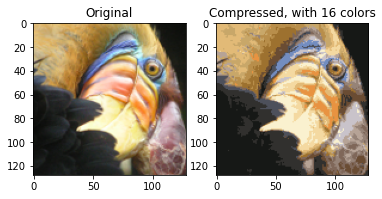

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(A)
ax1.set_title('Original')
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(X_recovered)
ax2.set_title('Compressed, with 16 colors')
plt.show()